<a href="https://colab.research.google.com/github/jiwon-min98/LearningPyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Image of any king
* Video
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets

Let's create a training set and testing set with our data

In [3]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

"Visualize, visualize, visualize!"

In [4]:
def plot_predictions(train_data= X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

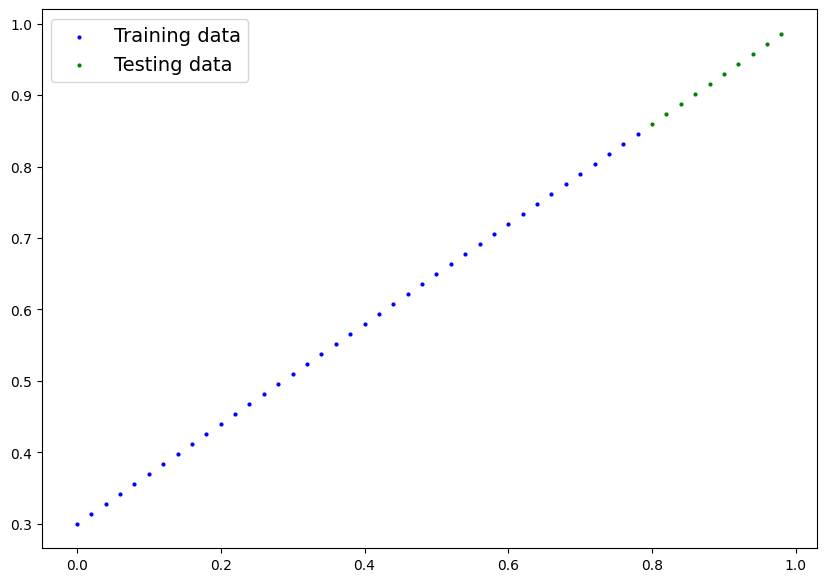

In [5]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

What out model does:
* start with random values (weight & bias)
* look at training data and adjust the random values to better represent the ideal values (the weight & bias we used to create the data)

How does it do so?

Throught two main algorithms:
1. Gradient descent
2. Backpropagation

In [6]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):  #<- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #Forward method to define the computation in the model
  def forward(self, x : torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should out model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overiid `forward()`
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward()

### Checking the contents of our PyTorch model

Now we've created a model, let's see what inside...

so we can check our model parameters or what's inside our model using `parameters`

In [7]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data though our model, it's going to run it through the forward() method

In [9]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [10]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

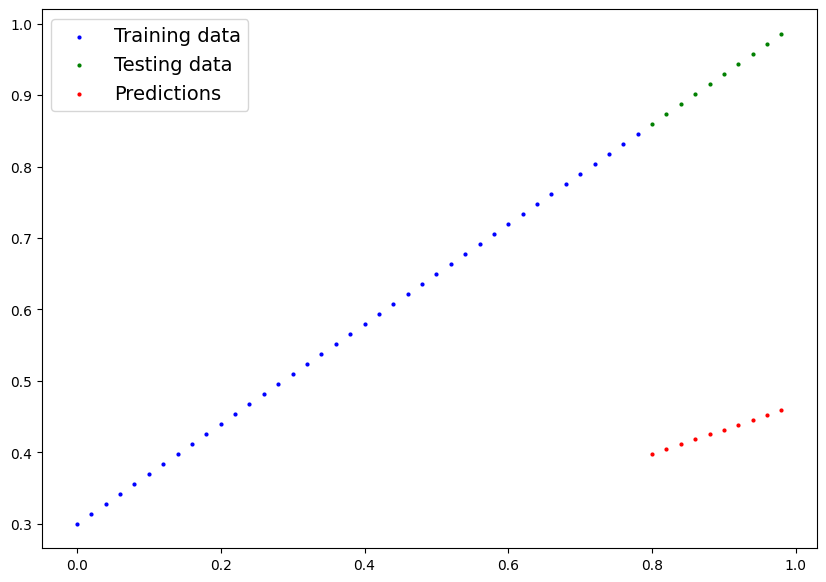

In [11]:
plot_predictions(predictions=y_preds)

are_deterministic_algorithms_enabled,
## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss functions.

* note: Loss function may also be called cost function or criterion in different areas


* **Loss function:** a function to measure how wrong the predictions are to the idea outputs, lower is the better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters

and specifically for PyTorch, we need:
* A training loop
* A testing loop

In [12]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr= learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [15]:
torch.manual_seed(42)
# An epoch is one loop through the data...
epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. step the optimizer (performs gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration

  ### Testing
  model_0.eval() # turns off different seettings in the model not needed for evaluation
  with torch.inference_mode():
    # 1. do the forward pass
    test_pred = model_0(X_test)
    # 2. calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss: {loss} | Test_loss: {test_loss}")
    print(model_0.state_dict())

Epoch:0 | Loss: 0.31288138031959534 | Test_loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss: 0.1976713240146637 | Test_loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss: 0.08908725529909134 | Test_loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss: 0.053148526698350906 | Test_loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss: 0.04543796554207802 | Test_loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss: 0.04167863354086876 | Test_loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss: 0.03818932920694351 | Test_loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

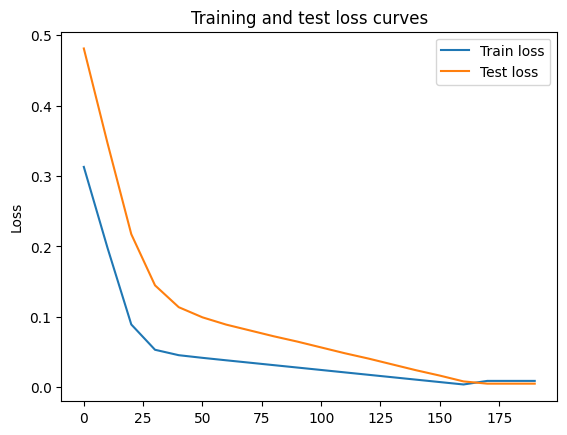

In [16]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.legend();

In [17]:
 with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

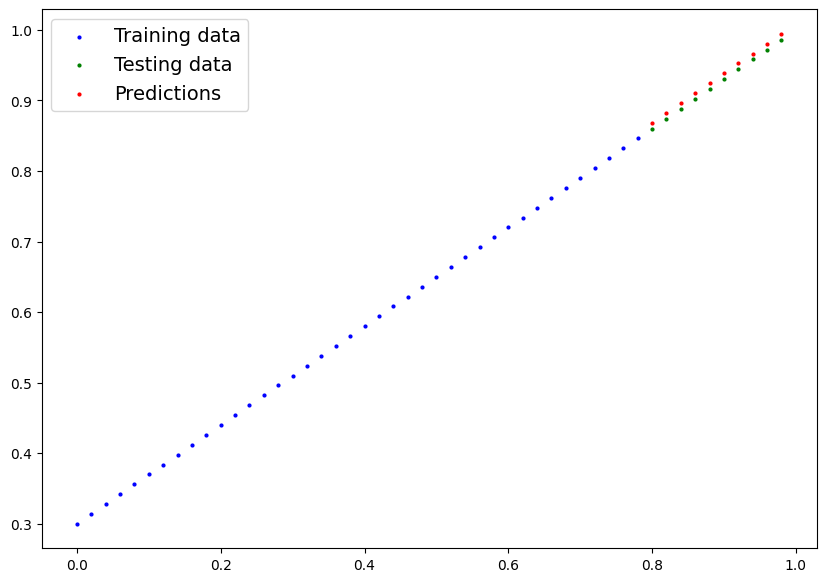

In [19]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are 3 main methods you should know about saving and loading models in PyTorch.

1. `torch.save()` -allows you to save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's state dictionary

In [20]:
# Saving our PyTorch mode
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state_dict
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH )

saving model to:models/01_pytorch_workflow_model_0.pth


In [21]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Sep 21 19:58 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load our `state_dict()` into that

In [22]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [25]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

In [26]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through all the steps above

In [56]:
# import PyTorch and matplotlib
import torch
from torch import nn

import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.
This means if we've got access to GPU, our code will use it.
If no GPU is available, the code will default to using CPU.

In [57]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [58]:
# Create some data using the linear regression formula of y = weight * x + bias
weight = 0.1
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3020],
         [0.3040],
         [0.3060],
         [0.3080],
         [0.3100],
         [0.3120],
         [0.3140],
         [0.3160],
         [0.3180]]))

In [59]:
# Split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

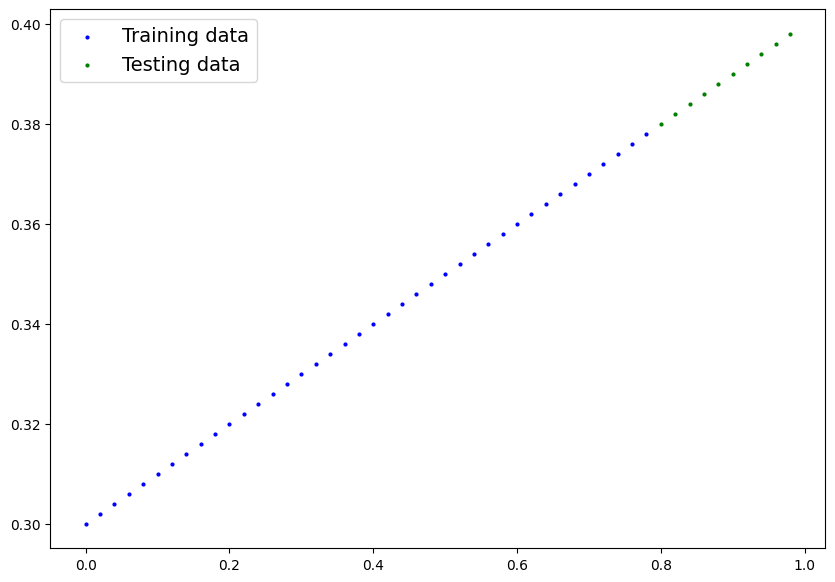

In [60]:
# Plot the data
plot_predictions(X_train, y_train, X_test,y_test)

## 6.2 Building a PyTorch Linear Model

In [61]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):  #<- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # use nn.linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [62]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [63]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [64]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr= 0.01)

In [65]:
# Let's write a training loop!
torch.manual_seed(42)

epochs = 500

# put data on the device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero gra
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
  test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss : {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss : 0.7891778945922852 | Test loss: 1.1079761981964111
Epoch: 10 | Loss : 0.6739680171012878 | Test loss: 0.9732664227485657
Epoch: 20 | Loss : 0.5587581992149353 | Test loss: 0.8385565876960754
Epoch: 30 | Loss : 0.4435482919216156 | Test loss: 0.7038467526435852
Epoch: 40 | Loss : 0.3283384442329407 | Test loss: 0.569136917591095
Epoch: 50 | Loss : 0.21312856674194336 | Test loss: 0.43442708253860474
Epoch: 60 | Loss : 0.12166541069746017 | Test loss: 0.3163045346736908
Epoch: 70 | Loss : 0.08707915246486664 | Test loss: 0.24224765598773956
Epoch: 80 | Loss : 0.07491476833820343 | Test loss: 0.19891345500946045
Epoch: 90 | Loss : 0.06944980472326279 | Test loss: 0.17378011345863342
Epoch: 100 | Loss : 0.06561239808797836 | Test loss: 0.15869207680225372
Epoch: 110 | Loss : 0.0621224120259285 | Test loss: 0.14767199754714966
Epoch: 120 | Loss : 0.05863240361213684 | Test loss: 0.1366519182920456
Epoch: 130 | Loss : 0.05519132688641548 | Test loss: 0.1283794492483139
Epoc

In [66]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1006]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2920], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [67]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.3725],
        [0.3745],
        [0.3765],
        [0.3785],
        [0.3806],
        [0.3826],
        [0.3846],
        [0.3866],
        [0.3886],
        [0.3906]], device='cuda:0')

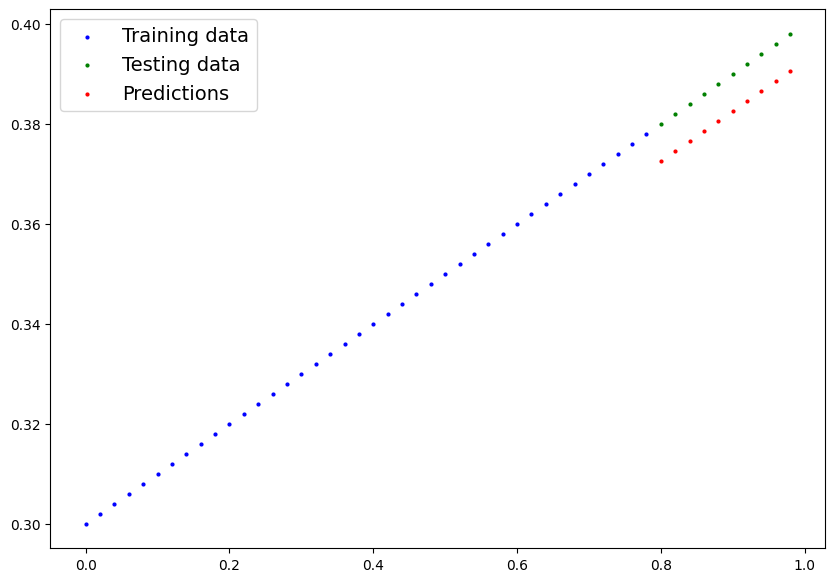

In [68]:
# Check out our model predictions visually
plot_predictions(train_data= X_train.cpu(),
                  train_labels = y_train.cpu(),
                  test_data=X_test.cpu(),
                  test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [70]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH

Saving model to: models/01_pytorch_workflow_model_1.pth


PosixPath('models/01_pytorch_workflow_model_1.pth')

In [72]:
# Load a PyTorch
# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [73]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [74]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')